# Assignment 2 

### Ying Sun

In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('seaborn')

### 1. Imputing age and gender

(a) In order to solve this incompleteness problem, here I use the imputation strategy. I use the information (weight, age and gender) in the dataset of SurveyIncome on some people to infer attributes (age and gender) of other people in BestIncome dataset. Besides, noting that female_{i}is a categorical variable, we need to use Logistic regression to estimate. Basically, the equations should be as follows:

$$ age_{i}=\beta_{0}+\beta_{1}wgt_{i}+\beta_{2}tot\underline{ }inc_{i}+ \varepsilon_{i}  $$
$$ \ln(\frac{P(female_{i})}{1-P(female_{i})})=\beta_{3}+\beta_{4}wgt_{i}+\beta_{5}tot\underline{ }inc_{i}+\varepsilon_{i} $$
Then I use labor income and capital income in the BestIncome dataset to form total income:

$$ tot\underline{ }inc_{i}=lab\underline{}inc_{i}+cap\underline{}inc_{i} $$

Then I use weight and formed total income to impute age and gender in the BestIncome dataset.

In [2]:
# I may use this code cell to read in my data, name my variables, run descriptive statistics, etc. 
names=['lab_inc','cap_inc','hgt','wgt']
df1=pd.read_table('BestIncome.txt',names=names,sep=',')
df1['tot_inc']=df1['lab_inc']+df1['cap_inc']
df1.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612


In [3]:
df1.tail()

,lab_inc,cap_inc,hgt,wgt,tot_inc
9995,51502.225233,14786.050723,66.781187,154.645212,66288.275956
9996,52624.117104,11048.811747,64.499036,165.868002,63672.928851
9997,50725.310645,13195.218100,64.508873,154.657639,63920.528745
9998,56392.824076,8470.592718,62.161556,145.498194,64863.416794
9999,44274.098164,12765.748454,64.974145,135.936862,57039.846618


In [4]:
df1.shape

(10000, 5)

In [5]:
names=['tot_inc','wgt','age','female']
df2=pd.read_table('SurvIncome.txt',names=names,sep=',')
df2.head()

,tot_inc,wgt,age,female
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [6]:
df2.tail()

,tot_inc,wgt,age,female
995,61270.538697,184.930002,46.356881,0.0
996,59039.159876,180.482304,50.986966,0.0
997,67967.188804,156.816883,40.965268,0.0
998,79726.914251,158.935050,41.190371,0.0
999,71005.223603,169.067695,48.480007,0.0


In [7]:
df2.shape

(1000, 4)

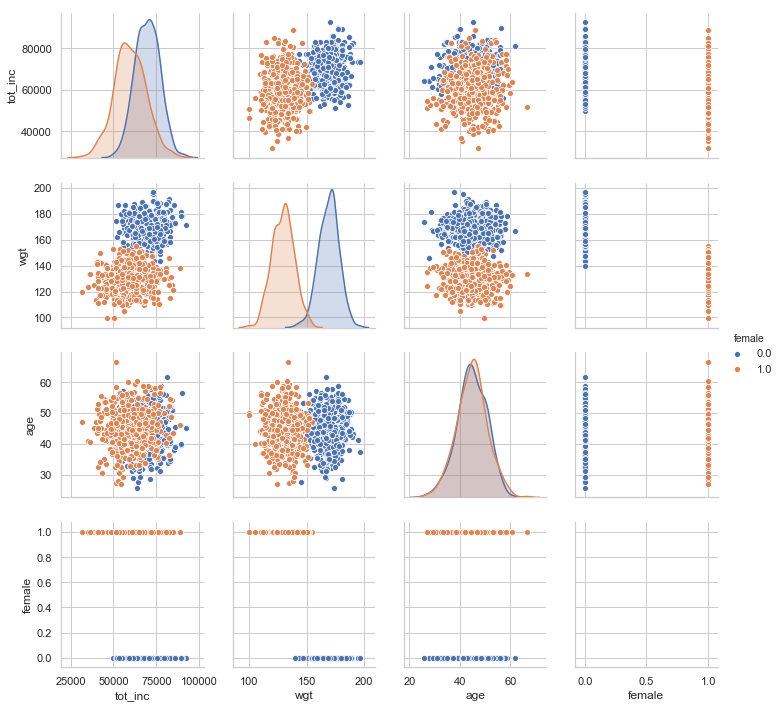

In [8]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.pairplot(df2, hue = "female")

#### (b) Here is where I'll use my proposed method from part (a) to impute variables.

In [9]:
# I will use this code cell to execute the code that will impute those variables.
#Define Outcome and Independent Variables
outcome  = 'age'
features = ['tot_inc','wgt']
X,y = df2[features], df2[outcome]
X.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [10]:
y.head()

0    46.610021
1    48.791349
2    48.429894
3    41.543926
4    41.201245
Name: age, dtype: float64

In [11]:
outcome  =['age']
features = ['tot_inc','wgt']
X,y = df2[features], df2[outcome]
X = sm.add_constant(X, prepend=False)
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.531
Time:                        19:52:37   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc      2.52e-05   2.26e-05      1.114      0.2

In [12]:
outcome  =['female']
features = ['tot_inc','wgt']
X,y = df2[features], df2[outcome]
X = sm.add_constant(X, prepend=False)
m = sm.Logit(y, X)
res = m.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        19:52:38   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc       -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
wgt           -0.4460      0

In [13]:
df1['imputed_age_by_tot_inc_wgt'] = 2.52e-05 * df1['tot_inc']- 0.0067* df1['wgt']+ 44.2097
df1['imputed_gender_by_tot_inc_wgt_logit'] = -0.0002 * df1['tot_inc']-0.4460* df1['wgt']+ 76.7929 
df1['imputed_gender_by_tot_inc_wgt_prob'] = 2.71828183**(df1['imputed_gender_by_tot_inc_wgt_logit'])/(1+2.71828183**(df1['imputed_gender_by_tot_inc_wgt_logit']))
df1.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age_by_tot_inc_wgt,imputed_gender_by_tot_inc_wgt_logit,imputed_gender_by_tot_inc_wgt_prob
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,-3.796726,0.021951
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,-10.367048,0.000031
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,-3.586401,0.026951
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,-3.322583,0.034805
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,-2.182210,0.101359


We need to classify the imputed_gender_by_tot_inc_wgt_prob into two categories: 0 and 1. So here I use 0.5 as a boundary value. If imputed_gender_by_tot_inc_wgt_prob is larger than 0.5, I classify it as 1 category or I classify it as 0 category.

In [14]:
def prob_gender(gender):
    if gender > 0.5:
        gender =1
    else:
        gender =0
    return gender

df1['imputed_gender_by_tot_inc_wgt']= df1.imputed_gender_by_tot_inc_wgt_prob.apply(prob_gender)  
df1.head()                                    

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age_by_tot_inc_wgt,imputed_gender_by_tot_inc_wgt_logit,imputed_gender_by_tot_inc_wgt_prob,imputed_gender_by_tot_inc_wgt
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,-3.796726,0.021951,0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,-10.367048,0.000031,0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,-3.586401,0.026951,0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,-3.322583,0.034805,0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,-2.182210,0.101359,0


In [15]:
BestIncome=df1[['lab_inc','cap_inc','hgt','wgt','imputed_age_by_tot_inc_wgt','imputed_gender_by_tot_inc_wgt']]
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,imputed_age_by_tot_inc_wgt,imputed_gender_by_tot_inc_wgt
0,52655.605507,9279.509829,64.568138,152.920634,44.745897,0
1,70586.979225,9451.016902,65.727648,159.534414,45.157777,0
2,53738.008339,8078.132315,66.268796,152.502405,44.745701,0
3,55128.180903,12692.670403,62.910559,149.218189,44.919024,0
4,44482.794867,9812.975746,68.678295,152.726358,44.554687,0


#### (c) Here is where I'll report the descriptive statistics for my new imputed variables.

In [16]:
# I will use this code cell to do so!
df1['imputed_age_by_tot_inc_wgt'].describe()

count    10000.000000
mean        44.894036
std          0.219066
min         43.980016
25%         44.747065
50%         44.890281
75%         45.042239
max         45.706849
Name: imputed_age_by_tot_inc_wgt, dtype: float64

In [17]:
df1['imputed_gender_by_tot_inc_wgt'].describe()

count    10000.000000
mean         0.229400
std          0.420468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: imputed_gender_by_tot_inc_wgt, dtype: float64

#### (d) Correlation matrix for the now six variables

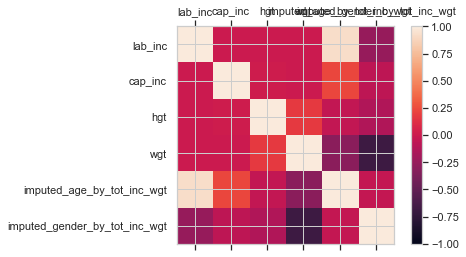

In [18]:
# Correlation matrix code and output
import matplotlib.pyplot as pl
def corr_plot(df):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    

    
    
corr_plot(BestIncome)

### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [19]:
# Read in my third data set
# Name my variables
names=['grad_year','gre_qnt','salary_p4']
IncomeIntel=pd.read_table('IncomeIntel.txt',names=names,sep=',')
IncomeIntel.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [20]:
# Run regression model
# Report coefficients and SE's
outcome  =['salary_p4']
features = ['gre_qnt']
X,y = IncomeIntel[features], IncomeIntel[outcome]
X = sm.add_constant(X, prepend=False)
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        19:52:51   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

Here we report the estimated result:
$$ \beta_{1}=-25.7632  \quad  s.e.(\beta_{1})= 1.365                              $$
$$  constant= 89540    \quad  s.e.(constant)=878.764                                $$

#### (b) Create a scatterplot of GRE score and graduation year. 

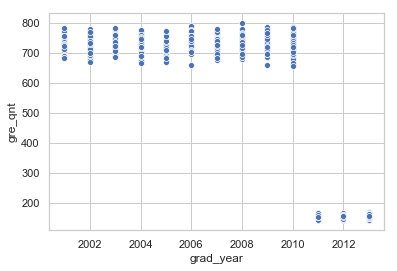

In [21]:
# Code and output of scatterplot
x=IncomeIntel['grad_year']
y=IncomeIntel['gre_qnt']
sns.scatterplot(x,y)

The problem is the system drift because the GRE quantitative scoring scale changed in 2011. The GRE quantitative scoring scale is 800 before 2011 and 170 after 2011 (2011 included). A possible solution of this problem is to change the old GRE quantitative scores before 2011 into new scale (170).

In [22]:
# Code to change the GRE quantitative scores in old scale into new scale
gre_new=IncomeIntel[['grad_year','gre_qnt']].apply(lambda x: x['gre_qnt']*(170/800) if x['grad_year']<2011 else x['gre_qnt'],axis=1)

IncomeIntel['gre_new']=gre_new
IncomeIntel.head()

,grad_year,gre_qnt,salary_p4,gre_new
0,2001.0,739.737072,67400.475185,157.194128
1,2001.0,721.811673,67600.584142,153.384980
2,2001.0,736.277908,58704.880589,156.459055
3,2001.0,770.498485,64707.290345,163.730928
4,2001.0,735.002861,51737.324165,156.188108


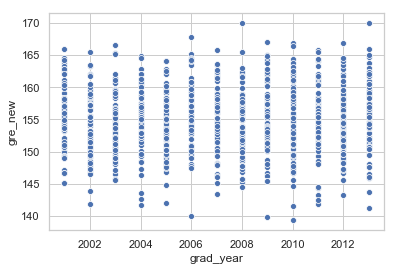

In [23]:
x= IncomeIntel['grad_year']
y= IncomeIntel['gre_new']
sns.scatterplot(x,y)

#### (c) Create a scatterplot of income and graduation year

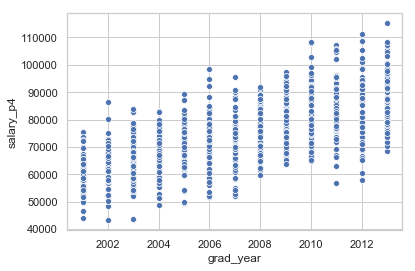

In [24]:
# Code and output of scatterplot
y=IncomeIntel['salary_p4']
x=IncomeIntel['grad_year']
sns.scatterplot(x,y)

The problem is the stationarity of salary_p4, it has a clear trend so we need to detrend salary_p4 before we do further analysis. The solution here is to:
1. Treat the first year of the data (grad_year=2001) equal to the base year.
2. Calculate the average growth rate in salary by calculate the mean salary each year and calculate the average growth rate in salaries across all 13 years.

In [25]:
# Code to calculate the mean salary each year
avg_inc_by_year = IncomeIntel['salary_p4'].groupby(IncomeIntel['grad_year']).mean().values

In [26]:
# Code to calculate the average growth rate in salaries across all 13 years
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()

In [27]:
IncomeIntel['salary_new']=IncomeIntel['salary_p4']/(1 + avg_growth_rate ) ** (IncomeIntel['grad_year']- 2001)
IncomeIntel.tail()

,grad_year,gre_qnt,salary_p4,gre_new,salary_new
995,2013.0,160.441025,100430.166532,160.441025,69757.765226
996,2013.0,160.431891,82198.200872,160.431891,57094.028581
997,2013.0,154.254526,84340.214218,154.254526,58581.849117
998,2013.0,162.036321,87600.881985,162.036321,60846.675557
999,2013.0,156.946735,82854.576903,156.946735,57549.940651


In [28]:
IncomeIntel['salary_new'].describe()

count     1000.000000
mean     61419.808910
std       7135.610865
min      41164.726530
25%      56616.517414
50%      61467.616002
75%      66218.595876
max      84516.856633
Name: salary_new, dtype: float64

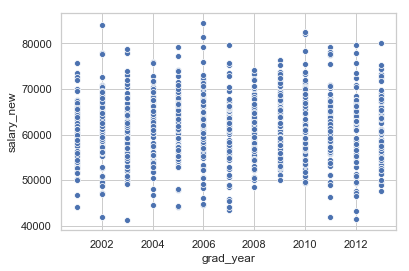

In [29]:
y= IncomeIntel['salary_new']
x= IncomeIntel['grad_year']
sns.scatterplot(x,y)

#### (d) Re-estimate coefficients with updated variables.

In [30]:
# Code to re-estimate, output of new coefficients
outcome  =['salary_new']
features = ['gre_new']
X,y = IncomeIntel[features], IncomeIntel[outcome]
X = sm.add_constant(X, prepend=False)
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             salary_new   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6043
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.437
Time:                        19:53:05   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_new      -34.9747     44.990     -0.777      0.4

Here we report our new estimated result:
$$ \beta_{1}=-34.9747  \quad  s.e.(\beta_{1})= 44.990                              $$
$$  constant= 66830    \quad  s.e.(constant)=6968.684                                $$
Now we need to compare this result with the previous result:

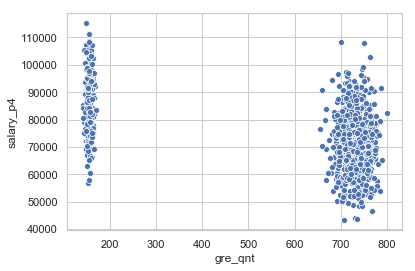

In [31]:
x_pre = IncomeIntel['gre_qnt']
y_pre = IncomeIntel['salary_p4']
sns.scatterplot(x_pre, y_pre)

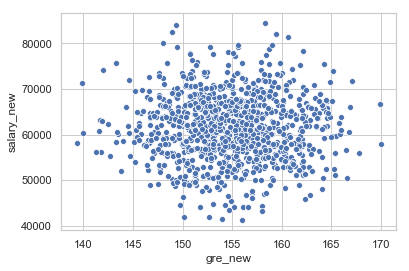

In [32]:
x_now = IncomeIntel['gre_new']
y_now = IncomeIntel['salary_new']
sns.scatterplot(x_now, y_now)

After we compare these two plots above,we can come to the following conclusions:
Before we modify the drift problem of GRE quantitative scores and eliminate time trends, GRE quantitative scores before 2011 are mainly on the left side of the first plot and new GRE quantitative scores after 2011 (2011 included) are mainly on the right side of the second plot. And we can find the p-value (estimated coefficient of gre_qnt) is small which indicates that we may reject the null hypothesis that intelligence is not related to higher income.
After we modify the drift problem of GRE quantitative scores and eliminate time trends, the distribution is much better than before.
By comparing the coefficients of two regression results, we find new beta1 is more negative than before but the p-value is large so it is not significant. As a result, according to the new regression result, we cannot reject the null hypothesis that intelligence is not related to higher income.

### 3. Assessment of Kossinets and Watts.

See attached PDF. 